# NO separar el dataset en entrenamiento y testeo a menos que me lo pida la consigna

In [1]:
FUENTES_DIR  = '../Fuentes'
DATOS_DIR   = '../Datos/' 

import sys
sys.path.append(FUENTES_DIR)

import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn import model_selection,preprocessing, metrics
from ClassPerceptron import Perceptron

In [2]:
datos = pd.read_csv(DATOS_DIR + "zoo.csv", encoding='latin1')

datos.head()
#len(datos)

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mamifero
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pez
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero


In [3]:
datos.Clase.unique()
len(datos.animal.unique())

100

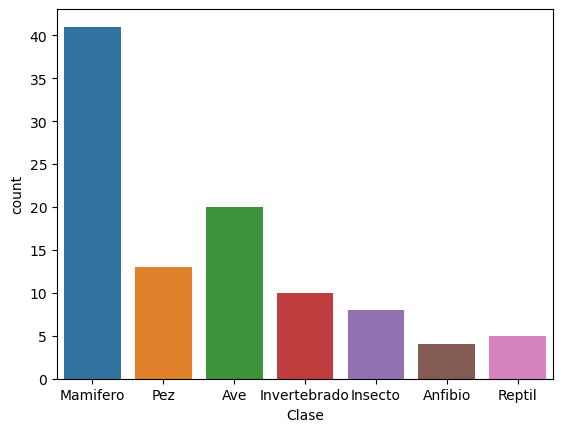

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Clase", data=datos)
plt.show()

## a)
Yo creo que la dificultad está en que solo las aves y mamíferos tienen más de 15 datos, por lo cual es probable que el modelo solo sea bueno prediciendo mamíferos

# b)
### A continuación vamos a entrenar el modelo sin dividir el dataset en train y test, simplemente porque así lo pide la consigna

In [5]:
mapeo = {
    "Clase":{'Mamifero':0, 'Pez':0, 'Ave':0, 'Invertebrado':0, 'Insecto':0, 'Anfibio':0, 'Reptil':1}
}
datos.replace(mapeo,inplace=True)
datos.head()

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,0
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,0


In [6]:
X = np.array(datos.iloc[:,1:-1])
T = np.array(datos['Clase'])

print(len(X))
print(len(T))

101
101


In [7]:
normalizador= preprocessing.StandardScaler() #media y desvío
X = normalizador.fit_transform(X)

print(X)

[[ 1.16139451 -0.49690399 -1.18522652 ... -1.69841555 -0.38435306
   1.13818037]
 [ 1.16139451 -0.49690399 -1.18522652 ...  0.58878406 -0.38435306
   1.13818037]
 [-0.86103386 -0.49690399  0.84372057 ...  0.58878406 -0.38435306
  -0.87859537]
 ...
 [ 1.16139451 -0.49690399 -1.18522652 ...  0.58878406 -0.38435306
   1.13818037]
 [-0.86103386 -0.49690399  0.84372057 ... -1.69841555 -0.38435306
  -0.87859537]
 [-0.86103386  2.01246118  0.84372057 ...  0.58878406 -0.38435306
  -0.87859537]]


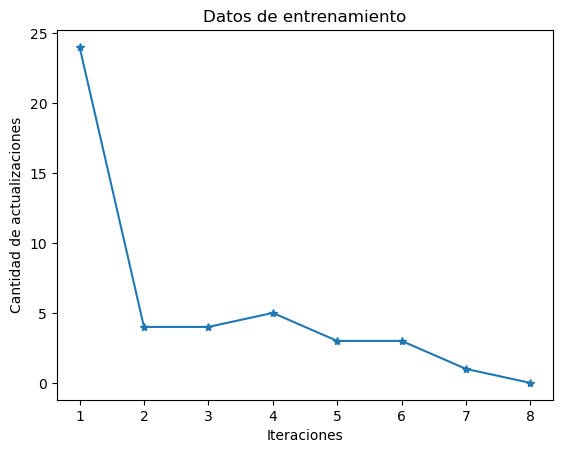

In [8]:
ppn = Perceptron(alpha=0.05, n_iter=200, random_state=None) #random_state=None significa que no utiliza una semilla para la generación de números aleatorios
ppn.fit(X, T)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='*')
plt.title('Datos de entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [9]:
Y_test = 0 * len(X) #necesario inicializar el array en 0?
Y_test = ppn.predict(X)
nAciertos = np.sum(Y_test == T)
print("Dimensiones de Y_test:", Y_test.shape)
print("Dimensiones de T_test:", T.shape)
print("cantidad de tests: ", X.shape[0])
print("aciertos: ", nAciertos)
print("%% de aciertos = %.2f %%" % (100 * nAciertos / X.shape[0]))

Dimensiones de Y_test: (101,)
Dimensiones de T_test: (101,)
cantidad de tests:  101
aciertos:  101
% de aciertos = 100.00 %


In [10]:
print(Y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]


In [11]:
print(T_test)

NameError: name 'T_test' is not defined

In [ ]:
print(ppn.w_)

# c)
El perceptrón detecta reptiles de la sigueinte forma:
Notar que hay ciertos errores, en parte por tener pocos datos de entrenamiento

In [ ]:
nro_columna = 1 #la primer columna del df no fue usada
pesos_por_columna = {}

for peso in ppn.w_:
    nombre_columna = datos.columns[nro_columna]
    if peso < 0:
        nombre_columna = "no "+nombre_columna
    pesos_por_columna.update({nombre_columna:abs(peso)})
    nro_columna += 1
    #print(nombre_columna, ":",peso)
    
pesos_ordenados = dict(sorted(pesos_por_columna.items(), key=lambda item: item[1], reverse=True))

print(pesos_ordenados.keys())